# Default Credit Cards: EDA, Statistical inference, Machine Learning

### By Selene Reyes

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.


# Table of Content

* [Objectives](#obj)
* [Importing packages and loading data](#imp)
* [Feature Engineering](#fe)
* [Exploratory Data Analysis (EDA)](#eda)
    * [Mapping the target: categorizing](#map)
    * [Descriptive Statistics](#stat)
    * [Standardizing and plotting features](#std)
    * [Correlation](#corr)
* [Machine Learning: Classification models](#ml)
    * [Feature Selection](#fs)
    * [Spliting the data: train and test](#sp)
    * [Logistic Regression (original data)](#lr1)
    * [Logistic Regression (standardized features)](#lr2)
    * [Logistic Regression (most important features)](#lr3)
    * [ExtraTree-decision](#tree)
    * [Random-Forest Classifier](#rf)
* [Comparison of model performance](#sum)
    * [Receiver operating characteristic (ROC) Curve](#roc)
    * [Mean Accuracy (coss-validation)](#ac)
    * [Precision, Recall, F1-score](#m)

<a id='obj'></a>
## Objectives:<br>
-       Identify the key drivers that determine the likelihood of credit card default.
-       Predict the likelihood of credit card default for customers of the Bank.


<a id='imp'></a>
## Importing packages and loading data

In [6]:
# here we will import the libraries used for machine learning
import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O, data manipulation 
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from pandas import set_option
plt.style.use('ggplot') # nice plots

from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.feature_selection import RFE
from sklearn.cross_validation import KFold # for cross validation
from sklearn.model_selection import GridSearchCV # for tuning parameter
from sklearn.model_selection import RandomizedSearchCV  # Randomized search on hyper parameters.
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.pipeline import Pipeline 
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model

In [99]:
xls = pd.ExcelFile("dir-python/DefaultCreditCards.xls")
data = pd.read_excel(xls, 'Data',skiprows=1, index_col = 0)
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


There are variables that need to be converted to categories:
* __SEX:__ Gender   
                    1 = male 
                    2 = female
* __EDUCATION:__     
                     1 = graduate school 
                     2 = university 
                     3 = high school 
                     4 = others 
                     5 = unknown 
                     6 = unknown
* __MARRIAGE:__ Marital status 
                    1 = married
                    2 = single
                    3 = others
* __PAY_0,2,3,4,5,6:__ Repayment status in September 2005, August 2005, July 2005, June 2005, May 2005, April 2005 (respectivey)
                    -2= no consumption
                    -1= pay duly
                    1 = payment delay for one month
                    2 = payment delay for two months
                    ... 
                    8 = payment delay for eight months
                    9 = payment delay for nine months and above

<a id='fe'></a>
## Feature engineering

The data has been already encoded and cleaned. However, some categorical data have repeated categories. For instance, the variable ‘education’ has three categories with similar information:<br>
4: others, 5: unknown, and 6: unknown<br>

In [105]:
data.rename(index=str, columns={"default payment next month": "Default"}, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
Default      30000 non-null int64
dtypes: int64(24)
memory usage: 5.7+ MB


In [9]:
# drop column "ID"
y = data.Default     # target yes=1 or no=0
features = data.drop('Default', axis = 1, inplace = False)

The education column of the dataset has many categories. It is necessary to reduce the categories for a better modelling. The categories 4:others, 5:unknown, and 6:unknown can be grouped into a single class '4'.

In [10]:
data['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0])

In [11]:
data['EDUCATION']=np.where(data['EDUCATION'] == 5, 4, data['EDUCATION'])
data['EDUCATION']=np.where(data['EDUCATION'] == 6, 4, data['EDUCATION'])
data['EDUCATION']=np.where(data['EDUCATION'] == 0, 4, data['EDUCATION'])

After grouping, the education column has the following categories:

In [12]:
data['EDUCATION'].unique()

array([2, 1, 3, 4])

The column 'marriage' should have three categories: 1 = married, 2 = single, 3 = others but it contains a category '0' which will be joined to the category '3'.

In [13]:
data['MARRIAGE'].unique()

array([1, 2, 3, 0])

In [14]:
data['MARRIAGE']=np.where(data['MARRIAGE'] == 0, 3, data['MARRIAGE'])

In [15]:
data['MARRIAGE'].unique()

array([1, 2, 3])

<a id='eda'></a>
## Exploratory Data Analysis (EDA)

<a id='map'></a>
### Mapping the target: categorizing

The data is imbalanced, since just 22% of the credit cards defaulted. For that reason, when evaluating models' performance, accuracy is not the best metric to use (I could have a model that never predicts default credit cards and it would be almost 80% accurate).

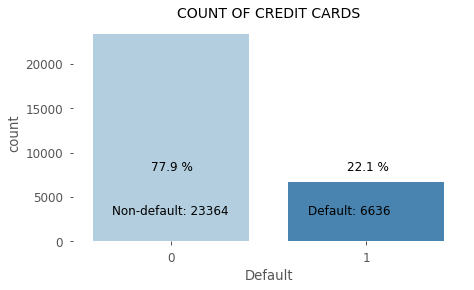

In [16]:
# The frequency of defaults
yes = data.Default.sum()
no = len(data)-yes

# Percentage
yes_perc = round(yes/len(data)*100, 1)
no_perc = round(no/len(data)*100, 1)

import sys 
plt.figure(figsize=(7,4))
sns.set_context('notebook', font_scale=1.2)
sns.countplot('Default',data=data, palette="Blues")
plt.annotate('Non-default: {}'.format(no), xy=(-0.3, 15000), xytext=(-0.3, 3000), size=12)
plt.annotate('Default: {}'.format(yes), xy=(0.7, 15000), xytext=(0.7, 3000), size=12)
plt.annotate(str(no_perc)+" %", xy=(-0.3, 15000), xytext=(-0.1, 8000), size=12)
plt.annotate(str(yes_perc)+" %", xy=(0.7, 15000), xytext=(0.9, 8000), size=12)
plt.title('COUNT OF CREDIT CARDS', size=14)
#Removing the frame
plt.box(False);

<a id='stat'></a>
### Descriptive Statistics

In [184]:
set_option('display.width', 100)
set_option('precision', 2)

print("SUMMARY STATISTICS OF NUMERIC COLUMNS")
print()
print(data.describe().T)

SUMMARY STATISTICS OF NUMERIC COLUMNS

             count       mean        std       min       25%       50%        75%       max
LIMIT_BAL  30000.0  167484.32  129747.66   10000.0  50000.00  140000.0  240000.00  1.00e+06
SEX        30000.0       1.60       0.49       1.0      1.00       2.0       2.00  2.00e+00
EDUCATION  30000.0       1.84       0.74       1.0      1.00       2.0       2.00  4.00e+00
MARRIAGE   30000.0       1.56       0.52       1.0      1.00       2.0       2.00  3.00e+00
AGE        30000.0      35.49       9.22      21.0     28.00      34.0      41.00  7.90e+01
PAY_0      30000.0      -0.02       1.12      -2.0     -1.00       0.0       0.00  8.00e+00
PAY_2      30000.0      -0.13       1.20      -2.0     -1.00       0.0       0.00  8.00e+00
PAY_3      30000.0      -0.17       1.20      -2.0     -1.00       0.0       0.00  8.00e+00
PAY_4      30000.0      -0.22       1.17      -2.0     -1.00       0.0       0.00  8.00e+00
PAY_5      30000.0      -0.27       1.13 

### Statistics of independent variables by class: Default and non-default credit cards

In [237]:
Default_1 = data.loc[data['Default'] == 1]
NonDef_0 = data.loc[data['Default'] == 0]

set_option('display.width', 100)
set_option('precision', 2)

print("SUMMARY STATISTICS - DEFAULT CREDIT CARDS")
print()
print(Default_1.describe().T)

SUMMARY STATISTICS - DEFAULT CREDIT CARDS

            count       mean        std       min       25%      50%        75%       max
LIMIT_BAL  6636.0  130109.66  115378.54   10000.0  50000.00  90000.0  200000.00  740000.0
SEX        6636.0       1.57       0.50       1.0      1.00      2.0       2.00       2.0
EDUCATION  6636.0       1.89       0.71       1.0      1.00      2.0       2.00       4.0
MARRIAGE   6636.0       1.53       0.53       1.0      1.00      2.0       2.00       3.0
AGE        6636.0      35.73       9.69      21.0     28.00     34.0      42.00      75.0
PAY_0      6636.0       0.67       1.38      -2.0      0.00      1.0       2.00       8.0
PAY_2      6636.0       0.46       1.50      -2.0      0.00      0.0       2.00       7.0
PAY_3      6636.0       0.36       1.50      -2.0     -1.00      0.0       2.00       8.0
PAY_4      6636.0       0.25       1.51      -2.0     -1.00      0.0       2.00       8.0
PAY_5      6636.0       0.17       1.48      -2.0     -1.

In [238]:
set_option('display.width', 100)
set_option('precision', 2)

print("SUMMARY STATISTICS - DEFAULT CREDIT CARDS")
print()
print(NonDef_0.describe().T)

SUMMARY STATISTICS - DEFAULT CREDIT CARDS

             count       mean        std       min       25%       50%        75%       max
LIMIT_BAL  23364.0  178099.73  131628.36   10000.0  70000.00  150000.0  250000.00  1.00e+06
SEX        23364.0       1.61       0.49       1.0      1.00       2.0       2.00  2.00e+00
EDUCATION  23364.0       1.83       0.75       1.0      1.00       2.0       2.00  4.00e+00
MARRIAGE   23364.0       1.56       0.52       1.0      1.00       2.0       2.00  3.00e+00
AGE        23364.0      35.42       9.08      21.0     28.00      34.0      41.00  7.90e+01
PAY_0      23364.0      -0.21       0.95      -2.0     -1.00       0.0       0.00  8.00e+00
PAY_2      23364.0      -0.30       1.04      -2.0     -1.00       0.0       0.00  8.00e+00
PAY_3      23364.0      -0.32       1.05      -2.0     -1.00       0.0       0.00  8.00e+00
PAY_4      23364.0      -0.36       1.01      -2.0     -1.00       0.0       0.00  8.00e+00
PAY_5      23364.0      -0.39       0

### Frequency of explanatory variables by defaulted and non-defaulted cards

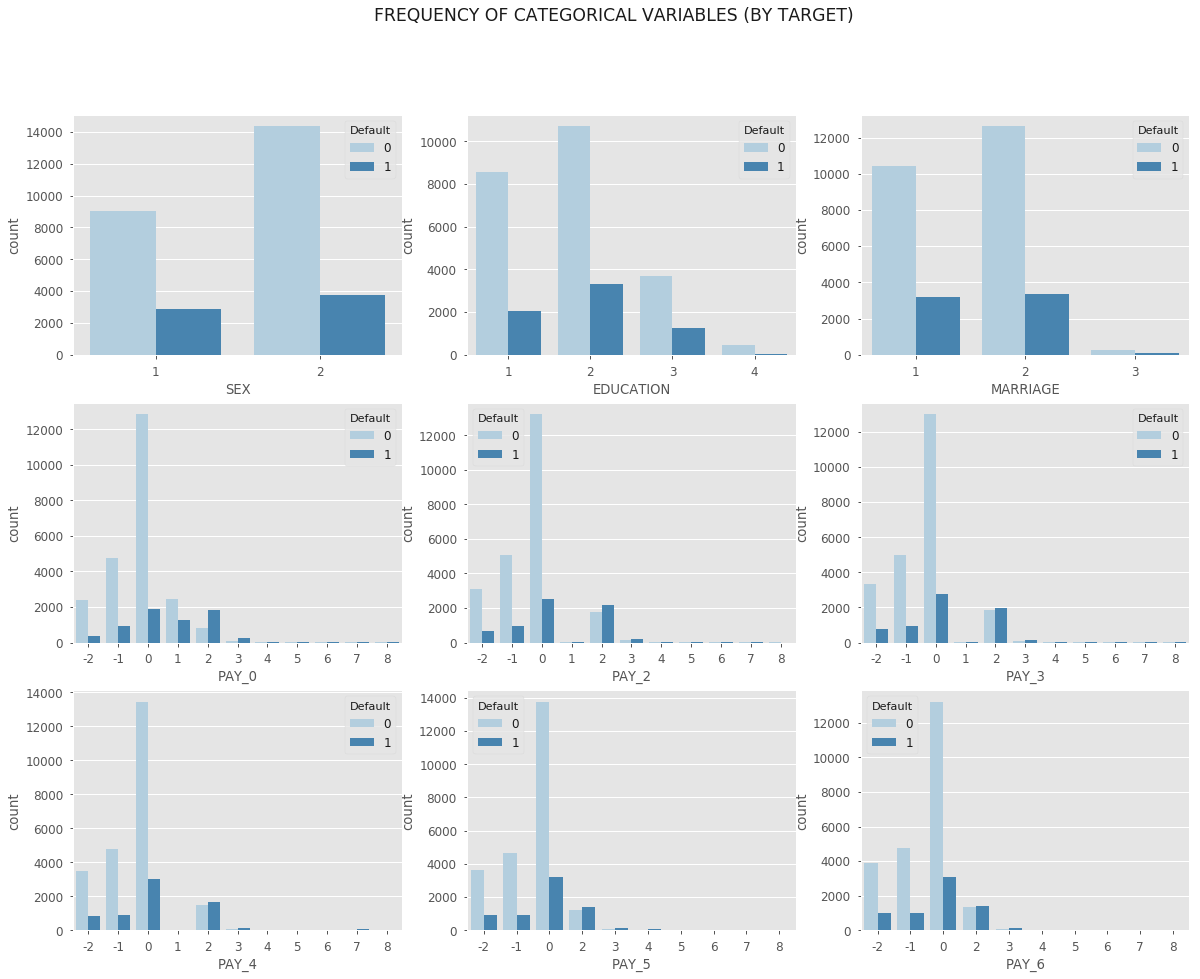

In [241]:
# Creating a new dataframe with categorical variables
subset = data[['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 
               'PAY_5', 'PAY_6', 'Default']]

f, axes = plt.subplots(3, 3, figsize=(20, 15), facecolor='white')
f.suptitle('FREQUENCY OF CATEGORICAL VARIABLES (BY TARGET)')
ax1 = sns.countplot(x="SEX", hue="Default", data=subset, palette="Blues", ax=axes[0,0])
ax2 = sns.countplot(x="EDUCATION", hue="Default", data=subset, palette="Blues",ax=axes[0,1])
ax3 = sns.countplot(x="MARRIAGE", hue="Default", data=subset, palette="Blues",ax=axes[0,2])
ax4 = sns.countplot(x="PAY_0", hue="Default", data=subset, palette="Blues", ax=axes[1,0])
ax5 = sns.countplot(x="PAY_2", hue="Default", data=subset, palette="Blues", ax=axes[1,1])
ax6 = sns.countplot(x="PAY_3", hue="Default", data=subset, palette="Blues", ax=axes[1,2])
ax7 = sns.countplot(x="PAY_4", hue="Default", data=subset, palette="Blues", ax=axes[2,0])
ax8 = sns.countplot(x="PAY_5", hue="Default", data=subset, palette="Blues", ax=axes[2,1])
ax9 = sns.countplot(x="PAY_6", hue="Default", data=subset, palette="Blues", ax=axes[2,2]);

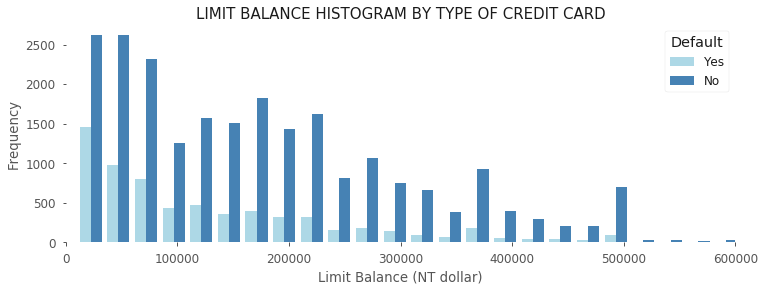

In [236]:
x1 = list(data[data['Default'] == 1]['LIMIT_BAL'])
x2 = list(data[data['Default'] == 0]['LIMIT_BAL'])

plt.figure(figsize=(12,4))
sns.set_context('notebook', font_scale=1.2)
#sns.set_color_codes("pastel")
plt.hist([x1, x2], bins = 40, normed=False, color=['steelblue', 'lightblue'])
plt.xlim([0,600000])
plt.legend(['Yes', 'No'], title = 'Default', loc='upper right', facecolor='white')
plt.xlabel('Limit Balance (NT dollar)')
plt.ylabel('Frequency')
plt.title('LIMIT BALANCE HISTOGRAM BY TYPE OF CREDIT CARD', SIZE=15)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=True);

There are 30,000 credit card clients.

The average value for the amount of credit card limit is 167,484 NT dollars. The standard deviation is 129,747 NT dollars, ranging from 10,000 to 1M NT dollars.

Education level is mostly graduate school and university.

Most of the clients are either marrined or single (less frequent the other status).

Average age is 35.5 years, with a standard deviation of 9.2.

As the value 0 for default payment means 'not default' and value 1 means 'default', the mean of 0.221 means that there are 22.1% of credit card contracts that will default next month (will verify this in the next sections of this analysis).

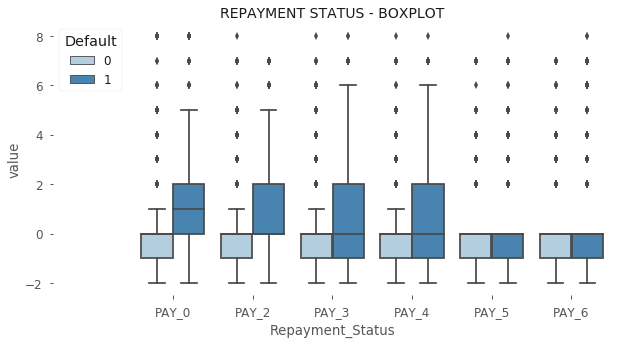

In [204]:
Repayment = data[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]

Repayment = pd.concat([y,Repayment],axis=1)
Repayment = pd.melt(Repayment,id_vars="Default",
                    var_name="Repayment_Status",
                    value_name='value')

plt.figure(figsize=(10,5))
sns.set_context('notebook', font_scale=1.2)
sns.boxplot(y="value", x="Repayment_Status", hue="Default", data=Repayment, palette='Blues')
plt.legend(loc='best', title= 'Default', facecolor='white')
plt.xlim([-1.5,5.5])
plt.title('REPAYMENT STATUS - BOXPLOT', size=14)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200);

It seems that PAY_0 (Repayment status in September) and PAY_2 (Repayment status in August)  have more discriminatory power the repayment status in other months.

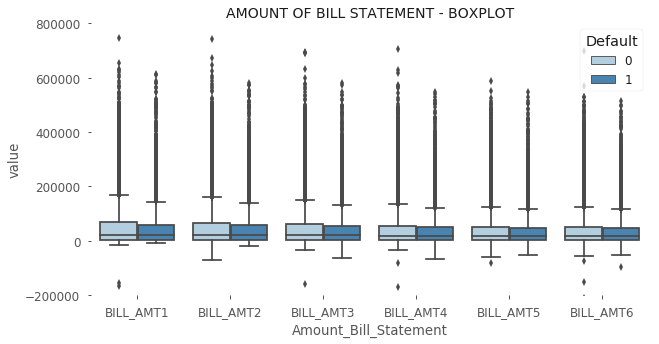

In [203]:
AmountBillStatement = data[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]

AmountBillStatement = pd.concat([y,AmountBillStatement],axis=1)
AmountBillStatement = pd.melt(AmountBillStatement,id_vars="Default",
                    var_name="Amount_Bill_Statement",
                    value_name='value')

plt.figure(figsize=(10,5))
sns.set_context('notebook', font_scale=1.2)
sns.boxplot(y="value", x="Amount_Bill_Statement", hue="Default", data=AmountBillStatement, palette='Blues')
plt.legend(loc='best', title= 'Default', facecolor='White')
plt.ylim([-200000,800000])
plt.title('AMOUNT OF BILL STATEMENT - BOXPLOT', size=14)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200);

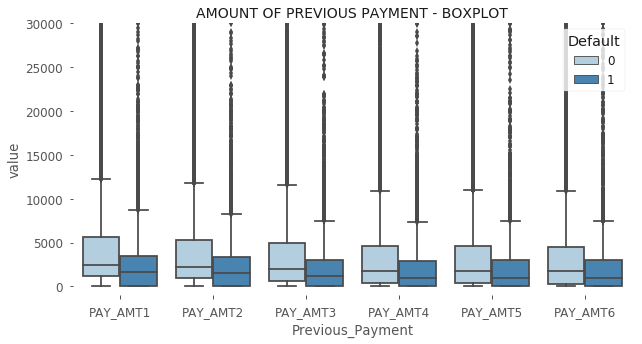

In [202]:
PreviousPayment = data[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]

PreviousPayment = pd.concat([y,PreviousPayment],axis=1)
PreviousPayment = pd.melt(PreviousPayment,id_vars="Default",
                    var_name="Previous_Payment",
                    value_name='value')

plt.figure(figsize=(10,5))
sns.set_context('notebook', font_scale=1.2)
sns.boxplot(y="value", x="Previous_Payment", hue="Default", data=PreviousPayment, palette='Blues')
plt.legend(title= 'Default', loc='upper right', facecolor='White')
plt.ylim([-1000,30000])
plt.title('AMOUNT OF PREVIOUS PAYMENT - BOXPLOT', size=14)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200);

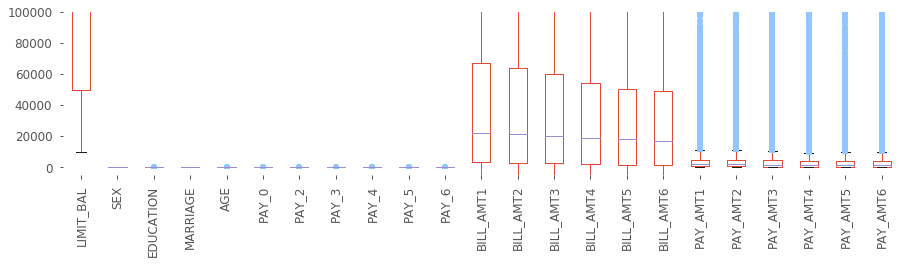

In [231]:
## data are distributed in a wide range (below), need to be normalizded.
plt.figure(figsize=(15,3))
ax= data.drop('Default', axis=1).boxplot(data.columns.name, rot=90)
outliers = dict(markerfacecolor='b', marker='p')
ax= features.boxplot(features.columns.name, rot=90, flierprops=outliers)
plt.xticks(size=12)
ax.set_ylim([-5000,100000])
plt.box(False);

It is possible to see that features are in different scales and units. In addtiion, there are features high variance 

<a id='std'></a>
### Standardizing and plotting the data

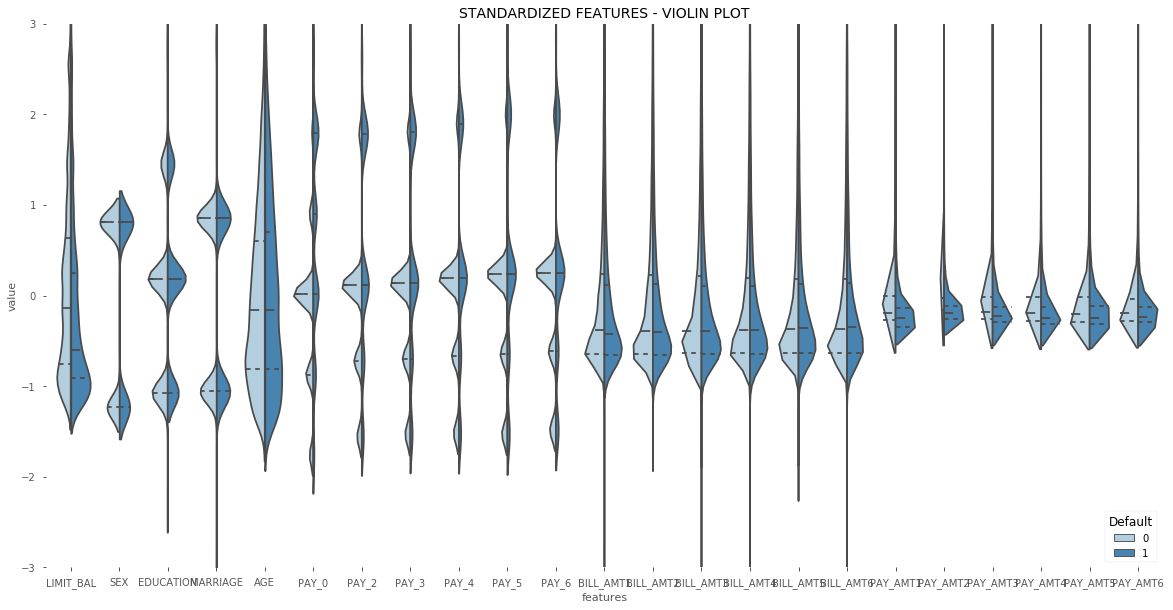

In [17]:
stdX = (features - features.mean()) / (features.std())              # standardization
data_st = pd.concat([y,stdX.iloc[:,:]],axis=1)
data_st = pd.melt(data_st,id_vars="Default",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(20,10))
sns.set_context('notebook', font_scale=1)
sns.violinplot(y="value", x="features", hue="Default", data=data_st,split=True, 
               inner="quart", palette='Blues')
plt.legend(loc=4, title= 'Default', facecolor='white')
plt.ylim([-3,3])
plt.title('STANDARDIZED FEATURES - VIOLIN PLOT', size=14)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=False);

Data frame with features that seem to have more discriminatory power:

In [18]:
df_discrim = data[['LIMIT_BAL','PAY_0','PAY_2','PAY_AMT1','PAY_AMT2','PAY_AMT3','Default']]

df_discrim.groupby('Default').mean().T

Default,0,1
LIMIT_BAL,178099.726074,130109.656420
PAY_0,-0.211222,0.668174
PAY_2,-0.301917,0.458258
PAY_AMT1,6307.337357,3397.044153
PAY_AMT2,6640.465074,3388.649638
PAY_AMT3,5753.496833,3367.351567


<a id='corr'></a>
### Correlation

Looking at correlations matrix, defined via Pearson function. 

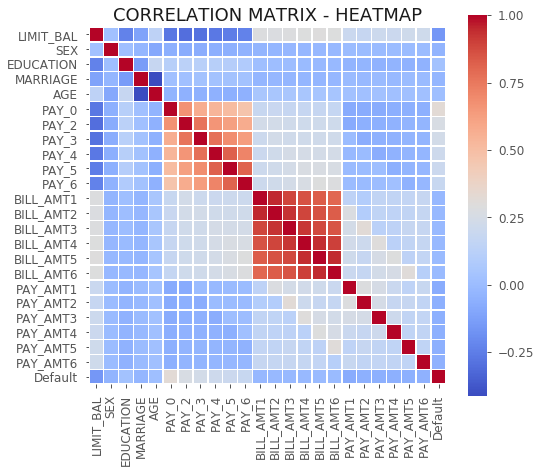

In [207]:
#  looking at correlations matrix, defined via Pearson function  
corr = data.corr() # .corr is used to find corelation
f,ax = plt.subplots(figsize=(8, 7))
sns.heatmap(corr, cbar = True,  square = True, annot = False, fmt= '.1f', 
            xticklabels= True, yticklabels= True
            ,cmap="coolwarm", linewidths=.5, ax=ax)
plt.title('CORRELATION MATRIX - HEATMAP', size=18);

The heatmat shows that features are correlated with each other (collinearity), such us like PAY_0,2,3,4,5,6 and BILL_AMT1,2,3,4,5,6. In those cases, the correlation is positive.<br>

Uncorrelated data are poentially more useful: discriminatory!

In [19]:
features.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

**What do correlations mean?**<br>

Lets separately fit correlated and uncorrelated data via linear regression: 

/Users/selenereyes/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Uncorrelated data are poentially more useful: discrimentory!


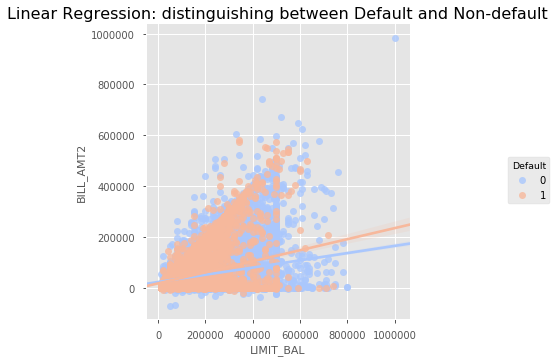

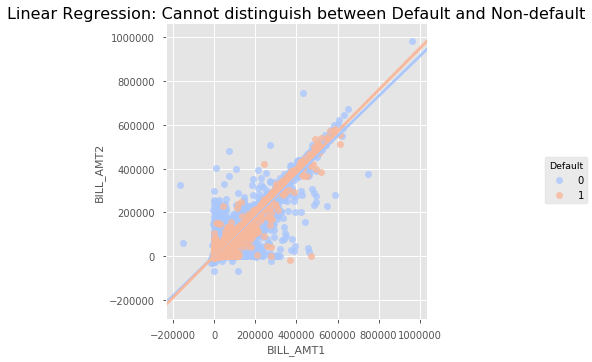

In [20]:
sns.lmplot(x='LIMIT_BAL', y= 'BILL_AMT2', data = data, hue ='Default', 
           palette='coolwarm')
plt.title('Linear Regression: distinguishing between Default and Non-default', size=16)


sns.lmplot(x='BILL_AMT1', y= 'BILL_AMT2', data = data, hue ='Default', 
           palette='coolwarm')
plt.title('Linear Regression: Cannot distinguish between Default and Non-default', size=16);

print('Uncorrelated data are poentially more useful: discrimentory!')

<a id='ml'></a>
## Machine Learning: Classification models

The classification models used for this analysis are: Logistic Regression, Decision Tree and Random Forest Classifier.<br>

To build machine learning models the original data was divided into features (X) and target (y) and then split into train (80%) and test (20%) sets. Thus, the algorithms would be trained on one set of data and tested out on a completely different set of data (not seen before by the algorithm).

<a id='sp'></a>
### Spliting the data into train and test sets
The original data was divided into features (X) and target (y), which were then splitted into train (80%) and test (20%) sets. Thus, the algorithms would be trained on one set of data and tested out on a completely different set of data (not seen before by the algorithm).

In [53]:
X = data.drop('Default', axis=1)  
y = data['Default']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=42)

In [49]:
Xstd_train, Xstd_test, ystd_train, ystd_test = train_test_split(stdX,y, test_size=0.2, stratify=y,
                                                                random_state=42)

<a id='fs'></a>
### Feature Selection

#### Recursive Feature Elimination
Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [45]:
NUM_FEATURES = 3
model = LogisticRegression()
rfe_stand = RFE(model, NUM_FEATURES)
fit_stand = rfe_stand.fit(stdX, y)
#print("St Model Num Features:", fit_stand.n_features_)
#print("St Model Selected Features:", fit_stand.support_)
print("Std Model Feature Ranking:", fit_stand.ranking_)
# calculate the score for the selected features
score_stand = rfe_stand.score(stdX,y)
print("Standardized Model Score with selected features is: %f (%f)" % (score_stand.mean(), score_stand.std()))

Std Model Feature Ranking: [ 7 15  9  8 10  1  6  4 18 11 21  1  5  2 20 13 19  3  1 14 12 16 17]
Standardized Model Score with selected features is: 0.812600 (0.000000)


In [46]:
feature_names = np.array(features.columns)
print('Most important features (RFE): %s'% feature_names[rfe_stand.support_])

Most important features (RFE): ['PAY_0' 'BILL_AMT1' 'PAY_AMT2']


* Repayment status in September (PAY_0)
* Amount of bill statement in September (BILL_AMT1)
* Amount of previous payments in August (PAY_AMT2)

In [51]:
Ximp = stdX[['PAY_0', 'BILL_AMT1', 'PAY_AMT2']]
X_tr, X_t, y_tr, y_t = train_test_split(Ximp,y, test_size=0.2, stratify=y, random_state=42)

<a id='lr1'></a>
### Logistic Regression (original data)

In [37]:
# Setup the hyperparameter grid, (not scaled data)
param_grid = {'C': np.logspace(-5, 8, 15)}

# Instantiate a logistic regression classifier
logreg = LogisticRegression()

# Instantiate the RandomizedSearchCV object
logreg_cv = RandomizedSearchCV(logreg,param_grid , cv=5, random_state=0)

# Fit it to the data
logreg_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 

Tuned Logistic Regression Parameters: {'C': 3.727593720314938}


Accuracy: 0.7788333333333334

             precision    recall  f1-score   support

          0       0.78      1.00      0.88      4673
          1       0.00      0.00      0.00      1327

avg / total       0.61      0.78      0.68      6000


Average 5-Fold CV Score: 0.7788 , Standard deviation: 0.0001


/Users/selenereyes/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


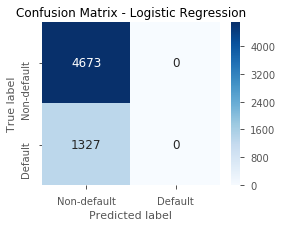

In [48]:
LR = LogisticRegression(C=3.73, random_state=0)
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_pred,y_test))

## 5-fold cross-validation 
cv_scores =cross_val_score(LR, X, y, cv=5)

# Print the 5-fold cross-validation scores
print()
print(classification_report(y_test, y_pred))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,LR.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Logistic Regression");

The model has not power predicting default credit cards. However, it can be observed that the average accuracy of the model is about 78%, which demonstrates that this metrics is not appropriate for the evaluation of this problem.

<a id='lr2'></a>
### Logistic Regression (standardized features)

In [39]:
# Instantiate the RandomizedSearchCV object:
logreg_cv_std = RandomizedSearchCV(logreg,param_grid , cv=5, random_state=0)

# Fit it to the standardized data
logreg_cv_std.fit(Xstd_train, ystd_train)

# Print the tuned parameters 
print("Tuned Logistic Regression Parameters with standardized features: {}".format(logreg_cv_std.best_params_)) 

Tuned Logistic Regression Parameters with standardized features: {'C': 3.727593720314938}


Accuracy: 0.8078333333333333

             precision    recall  f1-score   support

          0       0.82      0.97      0.89      4673
          1       0.69      0.24      0.36      1327

avg / total       0.79      0.81      0.77      6000


Average 5-Fold CV Score: 0.8099 , Standard deviation: 0.0047


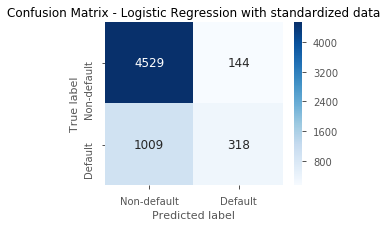

In [50]:
LRS = LogisticRegression(C=3.73, random_state=0)
LRS.fit(Xstd_train, ystd_train)
y_pred = LRS.predict(Xstd_test)
print('Accuracy:', metrics.accuracy_score(y_pred,ystd_test))

## 5-fold cross-validation 
cv_scores =cross_val_score(LRS, stdX, y, cv=5)

# Print the 5-fold cross-validation scores
print()
print(classification_report(ystd_test, y_pred))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(ystd_test,LRS.predict(Xstd_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Logistic Regression with standardized data");

The performance of the logistic regression model standardized data improved compared to the model built with the original dataset. Now the model is able to predict defaults; however, the recall is very low (0.24).

<a id='lr3'></a>
### Logistic Regression (most important features)

In [41]:
# Instantiate the RandomizedSearchCV object:
logreg_imp = RandomizedSearchCV(logreg,param_grid , cv=5, random_state=0)

# Fit it to the standardized data
logreg_imp.fit(X_tr, y_tr)

# Print the tuned parameters 
print("Tuned Logistic Regression Parameters with standardized important features: {}".format(logreg_imp.best_params_)) 

Tuned Logistic Regression Parameters with standardized important features: {'C': 3.727593720314938}


Accuracy: 0.8121666666666667

             precision    recall  f1-score   support

          0       0.82      0.97      0.89      4673
          1       0.69      0.27      0.39      1327

avg / total       0.79      0.81      0.78      6000


Average 5-Fold CV Score: 0.8118 , Standard deviation: 0.0064


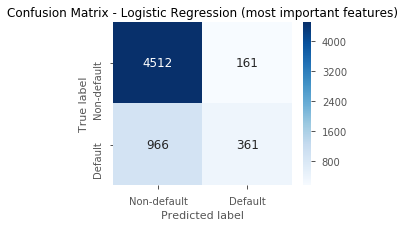

In [52]:
LR_imp = LogisticRegression(C=3.73, random_state=0)
LR_imp.fit(X_tr, y_tr)
y_pred = LR_imp.predict(X_t)
print('Accuracy:', metrics.accuracy_score(y_pred,y_t))

## 5-fold cross-validation 
cv_scores =cross_val_score(LR_imp, Ximp, y, cv=5)

# Print the 5-fold cross-validation scores
print()
print(classification_report(y_t, y_pred))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_t,LR_imp.predict(X_t))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Logistic Regression (most important features)");

When using just important features for building the model, there is a slight improvement in performance with respect to the previous model. Therefore, taking into account three features only, the model has the same predictive power than using 24 features. Thus, future strategies should be focused on: repayment status in September (PAY_0), amount of bill statement in September (BILL_AMT1), and amount of previous payments in August (PAY_AMT2).

<a id='tree'></a>
### Decision Tree Classifier

In [54]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [1,2,3,4,5,6,7,8,9],
              "max_features": [1,2,3,4,5,6,7,8,9],
              "min_samples_leaf": [1,2,3,4,5,6,7,8,9],
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_distributions=param_dist, cv=5, random_state=0)

# Fit it to the data
tree_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))

Tuned Decision Tree Parameters: {'min_samples_leaf': 8, 'max_features': 7, 'max_depth': 4, 'criterion': 'entropy'}


Accuracy: 0.8153333333333334

             precision    recall  f1-score   support

          0       0.84      0.95      0.89      4673
          1       0.65      0.35      0.46      1327

avg / total       0.80      0.82      0.79      6000


Average 5-Fold CV Score: 0.8159 , Standard deviation: 0.0069


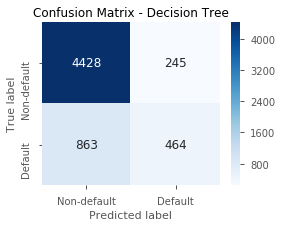

In [55]:
Tree = DecisionTreeClassifier(criterion= 'entropy', max_depth= 4, 
                                     max_features= 7, min_samples_leaf= 8, 
                                     random_state=0)
Tree.fit(X_train, y_train)
y_pred = Tree.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_pred,y_test))

## 5-fold cross-validation 
cv_scores =cross_val_score(Tree, X, y, cv=5)

# Print the 5-fold cross-validation scores
print()
print(classification_report(y_test, y_pred))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)), 
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,Tree.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Decision Tree");

The performance of the decision tree model improved compared to the logistic regression model showed previously. However, the recall is still low (0.35).

<a id='rf'></a>
### Random Forest Classifier

In [56]:
# Create the random grid
param_dist = {'n_estimators': [50,100,150,200,250],
               "max_features": [1,2,3,4,5,6,7,8,9],
               'max_depth': [1,2,3,4,5,6,7,8,9],
               "criterion": ["gini", "entropy"]}

rf = RandomForestClassifier()

rf_cv = RandomizedSearchCV(rf, param_distributions = param_dist, 
                           cv = 5, random_state=0, n_jobs = -1)

rf_cv.fit(X, y)

print("Tuned Random Forest Parameters:\n %s" % (rf_cv.best_params_))

Tuned Random Forest Parameters: {'n_estimators': 150, 'max_features': 5, 'max_depth': 6, 'criterion': 'gini'}


Accuracy: 0.8171666666666667

             precision    recall  f1-score   support

          0       0.84      0.95      0.89      4673
          1       0.66      0.35      0.46      1327

avg / total       0.80      0.82      0.79      6000


Average 5-Fold CV Score: 0.8204 , Standard deviation: 0.0096


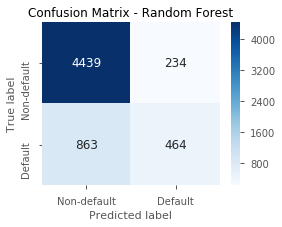

In [57]:
Ran = RandomForestClassifier(criterion= 'gini', max_depth= 6, 
                                     max_features= 5, n_estimators= 150, 
                                     random_state=0)
Ran.fit(X_train, y_train)
y_pred = Ran.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_pred,y_test))

## 5-fold cross-validation 
cv_scores =cross_val_score(Ran, X, y, cv=5)

# Print the 5-fold cross-validation scores
print()
print(classification_report(y_test, y_pred))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,Ran.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Random Forest");

The performance of the model with Random Forest is similar to the Decision Tree model. There is a slight improvement in precision but recall is still low.   

<a id='sum'></a>
## Comparison of model performance

<a id='roc'></a>
### Receiver operating characteristic (ROC) Curve

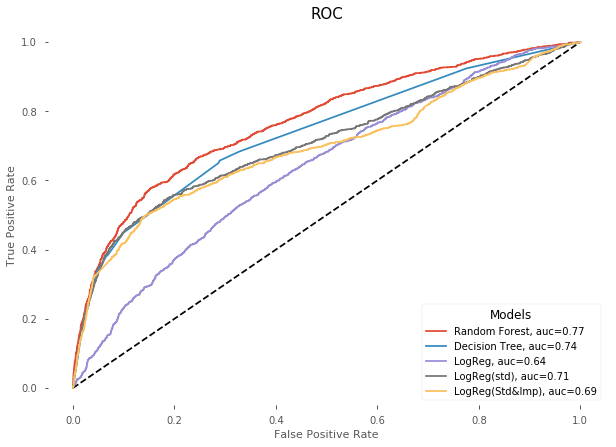

In [68]:
y_pred_proba_RF = Ran.predict_proba(X_test)[::,1]
fpr1, tpr1, _ = metrics.roc_curve(y_test,  y_pred_proba_RF)
auc1 = metrics.roc_auc_score(y_test, y_pred_proba_RF)

y_pred_proba_DT = Tree.predict_proba(X_test)[::,1]
fpr2, tpr2, _ = metrics.roc_curve(y_test,  y_pred_proba_DT)
auc2 = metrics.roc_auc_score(y_test, y_pred_proba_DT)

y_pred_proba_LR = LR.predict_proba(X_test)[::,1]
fpr3, tpr3, _ = metrics.roc_curve(y_test,  y_pred_proba_LR)
auc3 = metrics.roc_auc_score(y_test, y_pred_proba_LR)

y_pred_proba_LRS = LRS.predict_proba(Xstd_test)[::,1]
fpr4, tpr4, _ = metrics.roc_curve(ystd_test,  y_pred_proba_LRS)
auc4 = metrics.roc_auc_score(ystd_test, y_pred_proba_LRS)

y_pred_proba_LRimp = LR_imp.predict_proba(X_t)[::,1]
fpr5, tpr5, _ = metrics.roc_curve(y_t,  y_pred_proba_LRimp)
auc5 = metrics.roc_auc_score(y_t, y_pred_proba_LRimp)

plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr1,tpr1,label="Random Forest, auc="+str(round(auc1,2)))
plt.plot(fpr2,tpr2,label="Decision Tree, auc="+str(round(auc2,2)))
plt.plot(fpr3,tpr3,label="LogReg, auc="+str(round(auc3,2)))
plt.plot(fpr4,tpr4,label="LogReg(std), auc="+str(round(auc4,2)))
plt.plot(fpr5,tpr5,label="LogReg(Std&Imp), auc="+str(round(auc5,2)))
plt.legend(loc=4, title='Models', facecolor='white')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC', size=15)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=True);

The Receiver operating characteristic (ROC) Curve with the respective area under the curve (AUC) are shown below for each model. The highest AUC are obtained for the Random Forest Classifier model, with a value of 0.77. This means there is 77% chance that the model will be able to distinguish between default class and non-default class.

<a id='ac'></a>
### Mean Accuracy (coss-validation)

In [69]:
# Append different models
models = []

# Logistic Regression
models.append(('LogReg',
               LogisticRegression(C=3.73, random_state=0),'none'))

# Logistic Regression (with standardized data)
models.append(('LogReg(Std)',
               LogisticRegression(C=3.73, random_state=0),'Std'))

# Logistic Regression with standardized and important features
models.append(('LogReg(Std&Imp)',
               LogisticRegression(C=3.73, random_state=0),'imp'))

# Decision Tree
models.append(('Decision Tree', 
              DecisionTreeClassifier(criterion= 'entropy', max_depth= 4, 
                                     max_features= 7, min_samples_leaf= 8, 
                                     random_state=0),'none'))

# Random Forest Classifier
models.append(('Random Forest', 
              RandomForestClassifier(criterion= 'gini', max_depth= 6, 
                                     max_features= 5, n_estimators= 150, 
                                     random_state=0), 'none'))

In [70]:
# Evaluate each model
results = []
names = []
scoring = 'accuracy'

for name, model, Std in models:
    if Std == 'Std':
        cv_results = cross_val_score(model, stdX, y, cv=5, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)       
    elif Std == 'none':
        cv_results = cross_val_score(model, X, y, cv=5, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
    else:
        cv_results = cross_val_score(model, Ximp, y, cv=5, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

LogReg: 0.778767 (0.000116)
LogReg(Std): 0.809934 (0.004719)
LogReg(Std&Imp): 0.811834 (0.006442)
Decision Tree: 0.815934 (0.006900)
Random Forest: 0.820367 (0.009564)


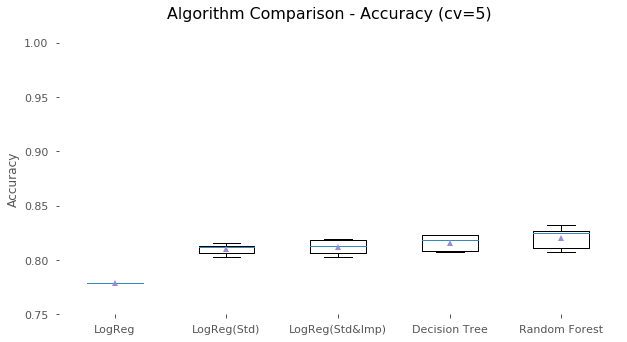

In [71]:
from matplotlib import pyplot
# Plot all the accuracy results vs. each model 
#(model type on the x-axis and accuracy on the y-axis).
fig = pyplot.figure(figsize=(10,5))
sns.set_context('notebook', font_scale=1.1)
fig.suptitle('Algorithm Comparison - Accuracy (cv=5)')
ax = fig.add_subplot(111)
pyplot.boxplot(results, showmeans=True)
ax.set_xticklabels(names)
ax.set_ylabel('Accuracy')
ax.set_ylim([0.75,1])
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=True);

The best accuracy is obtained for the Random Forest Classifier with a mean accuracy of 0.82, yet it is the model with higher variation (0.0096). In general, all models have comparable mean accuracy. Nevertheless, because the classes are imbalanced (the proportion of non default credit cards is higher than default) this metric is misleading. Furthermore, accuracy does not consider the rate of false positives (non-default credits cards that were predicted as default) and false negatives (default credit cards that were incorrectly predicted as non-default). Both cases have negative impact on the bank, since false positives leads to unsatisfied customers and false negatives leads to financial loss.

<a id='m'></a>
### Precision, Recall, F1-score

In [74]:
from astropy.table import Table, Column
data_rows = [('Logistic Regression', 'Standardized', 0.79, 0.81, 0.77),
              ('Logistic Regression', 'Important features', 0.79, 0.81, 0.78),
              ('Decision Tree', 'original', 0.80, 0.82, 0.79),
             ('Random Forest', 'original', 0.80, 0.82, 0.80)
            ]
t = Table(rows=data_rows, names=('Model', 'Data', 'Precision', 'Recall', 'F1'))
print(t)

       Model               Data        Precision Recall  F1 
------------------- ------------------ --------- ------ ----
Logistic Regression       Standardized      0.79   0.81 0.77
Logistic Regression Important features      0.79   0.81 0.78
      Decision Tree           original       0.8   0.82 0.79
      Random Forest           original       0.8   0.82  0.8
